In [1]:
# Dependencies
import numpy as np
import pandas as pd
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import matplotlib.pyplot as plt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==6).all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temps = list(np.ravel(results))
len(june_temps)
#june_temps

1700

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps, columns=['June Temps'])
june_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results = session.query(Measurement.tobs).filter(extract('month', Measurement.date)==12).all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temps = list(np.ravel(results))
len(dec_temps)

1517

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_df = pd.DataFrame(dec_temps, columns=['December Temps'])
december_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [12]:
#len( session.query(Measurement.tobs).all() )

## Additional charts for Tobs

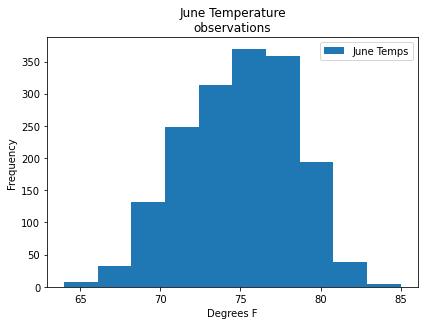

In [13]:
# and plot the results as a histogram
#june_df.plot.hist(bins=bins_list, figsize=(10, 7)) # stay within a range of 5 to 20 bins.
june_df.plot.hist(bins=10)
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Degrees F')
plt.title('June Temperature\nobservations')
plt.savefig("Resources/temps_june.png",bbox_inches="tight")

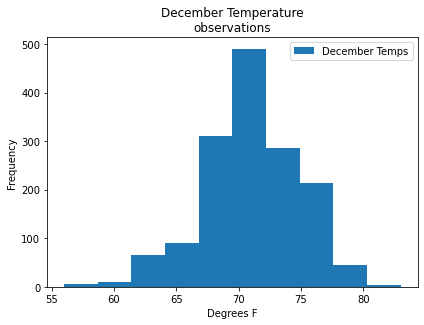

In [14]:
# and plot the results as a histogram
#december_df.plot.hist(bins=bins_list, figsize=(10, 7)) # stay within a range of 5 to 20 bins.
december_df.plot.hist(bins=10)
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Degrees F')
plt.title('December Temperature\nobservations')
plt.savefig("Resources/temps_dec.png",bbox_inches="tight")

## D3: Determine the Precipitation Statistics for June

In [15]:
results =session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).all()

In [16]:
june_precipitation = list(np.ravel(results))
len(june_precipitation)

1700

In [17]:
june_precipitation_df = pd.DataFrame(june_precipitation, columns=['June Precipitation'])
june_precipitation_df
june_precipitation_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


## D3: Determine the Precipitation Statistics for December

In [18]:
results = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).all()

In [19]:
dec_precipitation = list(np.ravel(results))
len(dec_precipitation)

1517

In [20]:
dec_precipitation_df = pd.DataFrame(dec_precipitation, columns=['December Precipitation'])
dec_precipitation_df

,December Precipitation
0,0.04
1,0.00
2,0.00
3,0.00
4,0.00
...,...
1512,0.14
1513,0.14
1514,1.03
1515,2.37


In [21]:
dec_precipitation_df.describe()

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


## Probability of Precipitation given is at least 0.01-0.10" of rain, we consider this than anything with less than this is a clear day

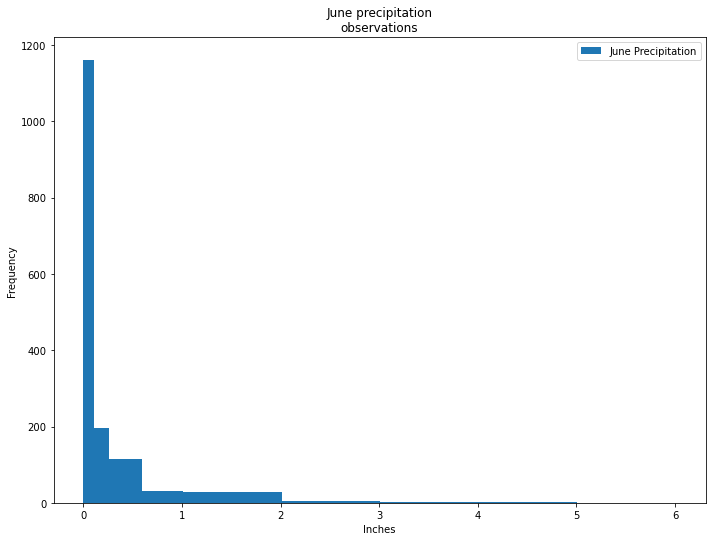

In [22]:
# and plot the results as a histogram
bins_list = [0, .11, .26, .6, .76, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01]
june_precipitation_df.plot.hist(bins=bins_list, figsize=(10, 7)) # stay within a range of 5 to 20 bins.
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Inches')
plt.title('June precipitation\nobservations')
plt.savefig("Resources/precipitation_june.png",bbox_inches="tight")

In [23]:
results = session.query(Measurement.prcp).filter(Measurement.prcp<=0.10).\
                        filter(extract('month', Measurement.date)==6).all()
print('June dry count : '+ str(len(results)))

June dry count : 1162


In [24]:
results = session.query(Measurement.prcp).filter(Measurement.prcp>0.10).\
                        filter(extract('month', Measurement.date)==6).all()
print('June wet count: '+ str(len(results)))

June wet count: 412


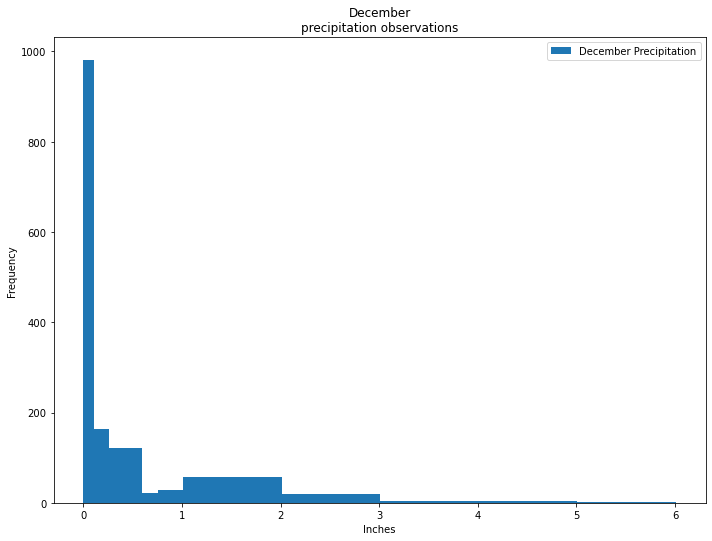

In [25]:
import matplotlib.pyplot as plt
# and plot the results as a histogram
bins_list = [0, .11, .26, .6, .76, 1.01, 2.01, 3.01, 4.01, 5.01, 6.01]
dec_precipitation_df.plot.hist(bins=bins_list, figsize=(10, 7)) # stay within a range of 5 to 20 bins.
plt.tight_layout()  #compress the x-axis labels
plt.xlabel('Inches')
plt.title('December\nprecipitation observations')
plt.savefig("Resources/precipitation_dec.png",bbox_inches="tight")

In [26]:
results = session.query(Measurement.prcp).\
                        filter(Measurement.prcp<=0.10).\
                        filter(extract('month', Measurement.date)==12).all()
print('Dec dry count : '+ str(len(results)))

Dec dry count : 982


In [27]:
results = session.query(Measurement.prcp).\
                    filter(Measurement.prcp>=0.10).\
                    filter(extract('month', Measurement.date)==12).all()
print('Dec wet count: '+ str(len(results)))

Dec wet count: 455


Counts are close to each other, possible best to consider locations that have a larger discrepancies of dry vs wet weather

## Location of averages of rainfall + temperatures by location

In [28]:
# Write a function called `calc_temps_rain` that will accept a date and return dataframe stats by stations
def calc_temps_rain(val_month):
    sel = [Measurement.station, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs),\
           func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)]
    results = session.query(*sel).group_by(Measurement.station).filter(extract('month', Measurement.date)==val_month).all()
    stations_df = pd.DataFrame(results, columns = ['station', 'min Tob' , 'avg Tob', 'max Tob','min prcp' , 'avg prcp', 'max prcp']) 
    return stations_df


In [29]:
stations_dec_df = calc_temps_rain(12)
stations_dec_df

,station,min Tob,avg Tob,max Tob,min prcp,avg prcp,max prcp
0,USC00511918,57.0,69.684211,81.0,0.00,0.138146,4.00
1,USC00513117,63.0,71.069444,80.0,0.00,0.203241,4.94
2,USC00514830,62.0,73.224719,79.0,0.00,0.154966,2.55
3,USC00516128,60.0,69.291262,83.0,0.00,0.507005,6.42
4,USC00517948,64.0,71.834862,82.0,0.00,0.152727,2.80
5,USC00518838,63.0,72.421053,78.0,0.02,0.638182,2.50
6,USC00519281,58.0,69.903226,79.0,0.00,0.244931,3.14
7,USC00519397,56.0,71.109524,77.0,0.00,0.075314,2.01
8,USC00519523,56.0,72.433333,79.0,0.00,0.162010,4.95


In [30]:
stations_jun_df = calc_temps_rain(6)
stations_jun_df

,station,min Tob,avg Tob,max Tob,min prcp,avg prcp,max prcp
0,USC00511918,66.0,74.139394,85.0,0.0,0.015157,0.58
1,USC00513117,68.0,74.050847,83.0,0.0,0.118248,4.43
2,USC00514830,67.0,76.005376,81.0,0.0,0.114192,3.60
3,USC00516128,66.0,71.937220,79.0,0.0,0.495748,2.80
4,USC00517948,64.0,76.655405,82.0,0.0,0.057975,1.71
5,USC00518838,67.0,73.394737,78.0,0.0,0.094615,0.82
6,USC00519281,65.0,73.271186,82.0,0.0,0.151525,1.39
7,USC00519397,70.0,77.559322,84.0,0.0,0.022661,0.89
8,USC00519523,71.0,76.668103,82.0,0.0,0.050044,0.51


## Location Heatmap of temperatures